In [1]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.stats.stattools import jarque_bera
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.preprocessing import MinMaxScaler
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf

import time
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import plotly.express as px

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('/content/drive/MyDrive/SckillFactory/ВУЗ/диплом/data/total_cpi_MinMaxScaler.csv')
df['ds'] = pd.to_datetime(df['ds'])

df = df.reset_index().rename(columns={'index': 'unique_id', 'ws': 'y'})
df['unique_id'] = df['unique_id'].apply(lambda x: '0')

end_train_start_test = int(len(df) * .85)
train_index, test_index = range(end_train_start_test), range(end_train_start_test, len(df))
Y_train_df, Y_test_df = df.iloc[train_index], df.iloc[test_index].reset_index(drop=True)

## HW

In [ ]:
ses = ExponentialSmoothing(Y_train_df.y, trend='add', seasonal='add', seasonal_periods=52)

results = ses.fit()
forecast = results.forecast(len(test_index))

In [ ]:
results.summary()

Dep. Variable:,y,No. Observations:,130
Model:,ExponentialSmoothing,SSE,0.092
Optimized:,True,AIC,-831.298
Trend:,Additive,BIC,-670.716
Seasonal:,Additive,AICC,-734.904
Seasonal Periods:,52,Date:,"Sun, 04 May 2025"
Box-Cox:,False,Time:,05:42:05
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.0840165,alpha,True
smoothing_trend,0.0239169,beta,True


In [ ]:
df_forecast = pd.read_csv('/content/drive/MyDrive/SckillFactory/ВУЗ/диплом/data/output/forecast_neural.csv')
df_forecast['HW'] = forecast.values
df_forecast.to_csv('/content/drive/MyDrive/SckillFactory/ВУЗ/диплом/data/output/forecast_neural.csv')

In [ ]:
mse = mean_squared_error(Y_test_df.y, forecast)
mae = mean_absolute_error(Y_test_df.y, forecast)

print(f'MSE: {mse}')
print(f'MAE: {mae}')

MSE: 0.0009134076719786852
MAE: 0.02427650750721905


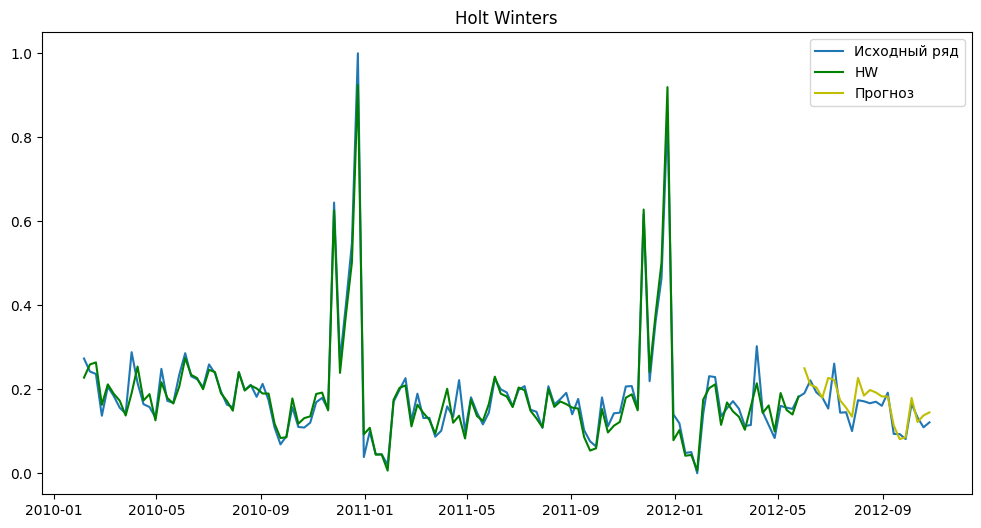

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(df.ds, df.y, label='Исходный ряд')
plt.plot(Y_train_df.ds, results.fittedvalues, c='g', label='HW')
plt.plot(Y_test_df.ds, forecast, c='y', label='Прогноз')
plt.legend()
plt.title('Holt Winters')
plt.show()

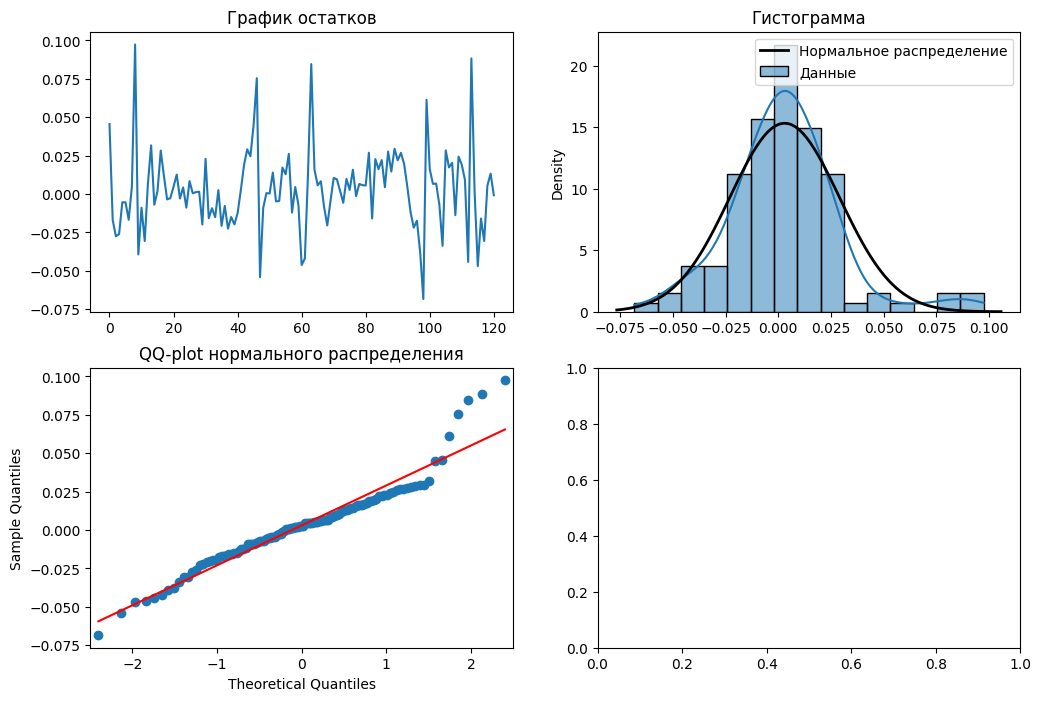

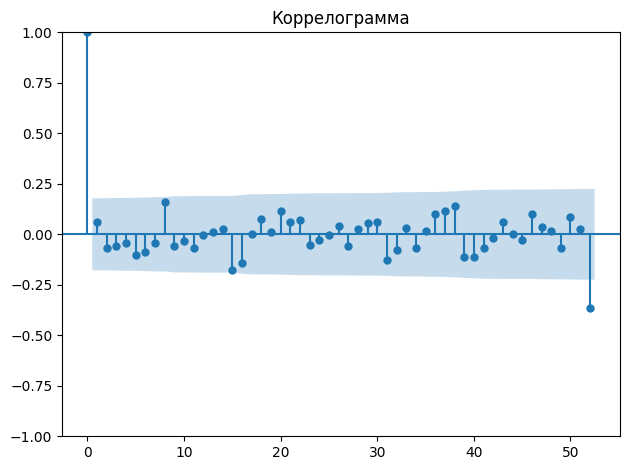

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm

# 1. Линейная визуализация
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
plt.plot(results.resid)
plt.title('График остатков')

# 2. Гистограмма с KDE и нормальным распределением
plt.subplot(2, 2, 2)
sns.histplot(results.resid, kde=True, stat='density', label='Данные')
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, np.mean(results.resid), np.std(results.resid))
plt.plot(x, p, 'k', linewidth=2, label='Нормальное распределение')
plt.title('Гистограмма')
plt.legend()

# 3. QQ-plot нормального распределения
plt.subplot(2, 2, 3)
sm.qqplot(results.resid, line='s', ax=plt.gca())
plt.title('QQ-plot нормального распределения')

# 4. Коррелограмма (если данные временные)
plt.subplot(2, 2, 4)
plot_acf(results.resid, lags=52)
# pd.plotting.autocorrelation_plot(results.resid, ax=plt.gca())
plt.title('Коррелограмма')

plt.tight_layout()
plt.show()

## library

In [ ]:
from numpy.typing import NDArray
import math as mt
import itertools

### Show

In [ ]:
class BaseError(Exception):
  def __init__(self, message: str):
    super().__init__(message)

  @classmethod
  def shapeError(*args):
    for i in range(2, len(args) - 1):
      assert args[i].shape == args[i + 1].shape, BaseError(f'x and y must have same first dimension, {args[i].shape} and {args[i + 1].shape}')


class SubplotError(Exception):
  def __init__(self, message: str):
    super().__init__(message)

  @classmethod
  def all_arg_one_type(*args):
    types = set([type(arg) for arg in args[1:]])
    assert len(types) == 1, SubplotError(f'Arguments don`t have one type')

  @classmethod
  def shapeError(*args):
    BaseError.shapeError(*args)


class Show():
    def __init__(self, base_figsize=(5, 2)) -> None:
        self.fig, self.axes = None, None
        self.shape, self.pos = None, [0, 0]
        self.base_figsize = base_figsize  # базовый размер для одного подграфика

    def create_subplot(self, nrows: int, ncols: int) -> None:
        self.shape = [nrows, ncols]
        # Автоматический расчет размера фигуры на основе количества подграфиков
        fig_width = self.base_figsize[0] * ncols
        fig_height = self.base_figsize[1] * nrows
        self.fig, self.axes = plt.subplots(nrows, ncols, figsize=(fig_width, fig_height))

    def add_subplot(self, xvalue: NDArray, yvalue: NDArray, **kwargs):
        if self.shape[0] == 1 and self.shape[1] == 1:
            self.axes.plot(xvalue, yvalue, **kwargs)
        elif self.shape[0] == 1 or self.shape[1] == 1:
            self.axes[self.pos[0] if self.shape[0] > 1 else self.pos[1]].plot(xvalue, yvalue, **kwargs)
        else:
            self.axes[self.pos[0], self.pos[1]].plot(xvalue, yvalue, **kwargs)

        if self.pos[1] + 1 < self.shape[1]:
            self.pos[1] += 1
        else:
            self.pos[0] += 1
            self.pos[1] = 0

    def subplot(self, xvalues: NDArray, yvalues: NDArray, nrows: int, ncols: int):
        SubplotError.shapeError(xvalues, yvalues)
        self.create_subplot(nrows, ncols)

        for i in range(xvalues.shape[0]):
            self.add_subplot(xvalues[i], yvalues[i])

        plt.subplots_adjust(wspace=0.3, hspace=0.2)
        plt.show()

    def subplot_x(self, yvalues: NDArray, ncols: int) -> None:
        xvalues = [np.arange(yvalues.shape[1])] * yvalues.shape[0]
        nrows = mt.ceil(yvalues.shape[0] / ncols)
        self.subplot(np.array(xvalues), yvalues, nrows, ncols)

    def one_plot(self, y: NDArray, labels: NDArray, x: NDArray = None, title: str = None) -> None:
        if x is None:
          x = np.array([np.arange(y.shape[1])] * y.shape[0])

        SubplotError.shapeError(x, y)

        for i, yv in enumerate(y):
          plt.plot(x[i], yv, label=labels[i])

        if title:
          plt.title(title)
        plt.legend()
        plt.show()

### GenerateData Analytics

In [ ]:
class GenerateDataError(Exception):
  def __init__(self, message: str):
    super().__init__(message)

  @classmethod
  def other_ts(*args):
    for i in range(1, len(args[1:]) - 1):
      assert (args[i].ts != args[i + 1].ts).sum(), GenerateDataError('Diferent time series')

  @classmethod
  def add_error(cls):
    raise GenerateDataError('Error add')

  @classmethod
  def init_param(cls, ts, change, data):
    assert data is not None or (ts is not None and change is not None), GenerateDataError('data or (ts and change) can be not None')


class GenerateData():
  def __init__(self, ts: NDArray = None, change: NDArray = None,  data=None, method: str = 'additive') -> None:
    GenerateDataError.init_param(ts, change, data)
    self.data = data
    if change is not None and ts is not None:
       if method == 'additive':
         self.data = self.additive_date(ts, change)

  def __add__(self, other):
    if isinstance(other, GenerateData):
      GenerateDataError.other_ts(self, other)
      data = np.vstack((self.data, other.data))
      return GenerateData(data=data)
    else:
      GenerateDataError.add_error()

  def additive_date(self, ts: NDArray, change: NDArray):
    ready = [ts + ch for ch in change]
    return np.array(ready)


class Analytics():
  def __init__(self, data: GenerateData, title: NDArray = None) -> None:
     self.title = title
     self.data = data

  def correlogram_compare(self, lags=52, alpha=.05, figsize=(12, 6)) -> None:
    nrows = self.data.shape[0]
    figsize = (figsize[0], figsize[1] * nrows / 3)
    fig, axes = plt.subplots(nrows=nrows, ncols=2, figsize=figsize)
    axes = axes.ravel()
    i_axes = 0

    for i in range(self.data.shape[0]):
      plot_acf(self.data[i],
               lags=lags,
               ax=axes[i_axes],
               alpha=alpha,
               title=f'ACF {self.title[i] if self.title is not None else ""}',
               zero=False)
      plot_pacf(self.data[i],
                lags=lags,
                alpha=alpha,
                ax=axes[i_axes + 1],
                title=f'PACF {self.title[i] if self.title is not None else ""}',
                zero=False)
      i_axes += 2

    # Настройка общего заголовка
    plt.suptitle(f'Correlograms for Time Series Analysis (α={alpha})', y=1.02)
    plt.tight_layout()
    plt.show()

  def correlogram_compare_one(self, lags=52, alpha=.05, figsize=(12, 6)) -> None:
    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=figsize)

    for i in range(self.data.shape[0]):
      plot_acf(self.data[i],
               lags=lags,
               ax=ax1,
               alpha=alpha,
               title=f'ACF',
               zero=False)
      plot_pacf(self.data[i],
                lags=lags,
                alpha=alpha,
                ax=ax2,
                title=f'PACF',
                zero=False)

    plt.suptitle(f'Correlograms for Time Series Analysis (α={alpha})', y=1.02)
    plt.tight_layout()
    plt.show()

  def plot_ts(self) -> None:
    show = Show()
    show.subplot_x(self.data, 2)

### Split HWCompare

In [ ]:
class SplitTrainTestError(Exception):
  def __init(self, message):
    super().__init__(message)

  def half(half):
    assert half >= 0 and half <= 1, SplitTrainTestError(f'The half can be belongs to the interval [0, 1]')


class SplitTrainTest():
  def __init__(self, data: GenerateData, half: float | int):
    SplitTrainTestError.half(half)

    self.half = half
    self.data_original = data
    self.train_index, self.test_index = self.__get_split_index(self.data_original.shape[1])
    self.data_split = None

  def __get_split_index(self, len):
    end_train_start_test = int(len * self.half)
    return np.arange(0, end_train_start_test), np.arange(end_train_start_test, len)

  def split(self):
    new_data = [[dt[self.train_index], dt[self.test_index]] for dt in self.data_original]
    self.data_split = new_data
    return self.data_split

  def split_use_signs(self, df_sings):
    self.split()
    x_train, x_test = df_sings.iloc[self.train_index], df_sings.iloc[self.test_index]
    return (x_train, x_test, self.data_split)


class ModelCompare():
  def __init__(self, gd: GenerateData, name: NDArray, df_path: str, df_path_long_forecast: str, columns, step_lf: int):
    self.params = []

    self.split = SplitTrainTest(gd.data, .85)
    self.data = self.split.data_split
    self.name = name
    self.df_path = df_path
    self.df_path_long_forecast = df_path_long_forecast
    self.df = pd.DataFrame(columns=columns)

    if self.df_path_long_forecast is not None:
      self.df_long_forecast = pd.DataFrame(columns=[f'{cl}' for cl in range(step_lf, self.split.test_index.size, step_lf)])


class HWCompare(ModelCompare):
  def __init__(self, gd: GenerateData, name: NDArray, df_path: str, df_path_long_forecast: str = None, step_lf=3) -> None:
    columns=['name', 'trend', 'seasonal', 'period', 'aicc', 'bic', 'mae', 'mse']
    super().__init__(gd, name, df_path, df_path_long_forecast, columns, step_lf)
    self.data = self.split.split()

  def build_hw(self, i_data: int, trend: str, seasonal: str, seasonal_period: int):
    train = self.data[i_data][0]
    test = self.data[i_data][1]

    ses = ExponentialSmoothing(train, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_period)
    result = ses.fit()
    forecast = result.forecast(test.size)

    mae = mean_absolute_error(test, forecast)
    mse = mean_squared_error(test, forecast)

    self.df.loc[self.df.shape[0]] = [self.name[i_data], trend, seasonal, seasonal_period, result.aicc, result.bic, mae, mse]
    self.df.to_csv(self.df_path, index=False)

    if self.df_path_long_forecast is not None:
      self.long_forecast(result, test)

  def long_forecast(self, result, test):
    forecast = []
    for step in range(3, test.size, 3):
      fr = result.forecast(steps=step)
      mae = mean_absolute_error(test[:step], fr)
      mse = mean_squared_error(test[:step], fr)
      forecast.append((mae, mse))

    self.df_long_forecast.loc[self.df_long_forecast.shape[0]] = forecast
    self.df_long_forecast.to_csv(self.df_path_long_forecast, index=False)

  def compare(self, size_seasonal, period=[52]) -> None:
    trend = [None, 'add']
    seasonal = [None, 'add']

    print(f'All combinations {len(self.data[:-size_seasonal]) * 4 + size_seasonal * 4 * len(period)}')
    i_combination = 1

    for i_data in range(len(self.data)):
      for t in trend:
        for s in seasonal:
          if i_data < (len(self.data[:-size_seasonal])):
            print(f'cimbination {i_combination}')
            i_combination += 1
            self.build_hw(i_data, t, s, period[0])
          else:
            for p in period[1:]:
              print(f'cimbination {i_combination}, period {p}')
              i_combination += 1
              self.build_hw(i_data, t, s, p)


### BestParams

In [ ]:

class BestParams():
  def __init__(self):
    self.df = pd.DataFrame()
    self.df_long_forecast = pd.DataFrame()
    self.best_params = []

  def load(self, path_df, path_df_lf=None):
    self.df = pd.read_csv(path_df)
    if path_df_lf:
      self.df_long_forecast = pd.read_csv(path_df_lf)

  def get_best_params(self, columns_params, sort_by):
    best_params = []
    for name in self.df['name'].unique():
      dff = self.df[self.df['name'] == name]
      dffs = dff.sort_values(by=sort_by, ascending=[True, True]).iloc[0]  # сортируем и берем первую строку
      params = {clp: dffs[clp] for clp in columns_params}
      best_params.append(params)
    return best_params

  def search_best_params(self, columns_params, sort_by=['aicc', 'bic']):
    best_params = self.get_best_params(columns_params, sort_by=sort_by)
    for bp in best_params:
      self.best_params.append(list(bp.values()))
    return self.best_params

  def print(self):
    for bp in self.best_params:
      for i, b in enumerate(bp):
        if i == 0:
          print('[', end='')
        print(b, end='')
        if i == len(bp) - 1:
          print(']')
        else:
          print(', ', end='')

  def __args_plot(self, bp, type_ts, inf_cr, name):
    information_cr, title, labels, x = [[] for _ in range(len(inf_cr))], [], [], []
    for b_dict in bp:
      if type_ts in b_dict[name]:
        for i, cr in enumerate(inf_cr):
          information_cr[i].append(b_dict[cr])


        fb_dict_key = [
            key
            for key in b_dict.keys()
            if key not in [name] + inf_cr
        ]
        title.append((b_dict[k] for k in fb_dict_key))
        x.append(float(b_dict[name].split(type_ts + '=')[-1]))

    for title_name in title:
      string = ''
      for tn in title_name:
        string += str(tn) + ' '
      labels.append(string)
    return information_cr, labels, x

  def plot(self, columns_params, type_ts=['k', 'alpha', 'freq'], inf_cr=['aicc', 'bic'], sort_by=['aicc', 'bic'], name='name', show_labels=False):
    bp = self.get_best_params(columns_params, sort_by=sort_by)
    for t in type_ts:
      information_cr, labels, x = self.__args_plot(bp, t, inf_cr, name)

      for i, cr in enumerate(inf_cr):
        plt.plot(x, information_cr[i], marker='o', label=cr.upper())
      plt.legend()
      plt.title('line trend' if t == 'k' else 'exp trend' if t == 'alpha' else 'sin seasonal')
      if show_labels:
        plt.xticks(x, labels, rotation=45)
      else:
        plt.xlabel(t)
      if len(inf_cr) == 1:
        plt.ylabel(inf_cr[0].upper())
      plt.show()


### GenerteComponents

In [ ]:
class GenerateComponents(GenerateData):
  def __init__(self, t: NDArray): # , data: NDArray = np.array([[]])
    # super().__init__(data=data)
    self.t = t

  def gen_line_trend(self, coefficient: NDArray, normalize=True):
    trend = np.array([k * self.t for k in coefficient])
    if normalize:
      trend = trend / trend.max()
    return GenerateData(data=trend)

  def gen_exp_trend(self, alphas: NDArray):
    n = self.t.shape[0]
    trend = []
    for alpha in alphas:
      trend.append([alpha ** (n - i) for i in range(1, n + 1)])

    trend = np.array(trend)
    return GenerateData(data=trend)

  def gen_seasonal(self, freq, coef=1, normalize=True):
    seasonal = np.array([np.sin(2 * np.pi * (1 / f) * self.t) for f in freq])
    if normalize:
      seasonal = seasonal + 1
      seasonal = seasonal / seasonal.max() * coef
    return GenerateData(data=seasonal)

  def generate_all(self, coefficient_lt, alpha_et, freq_s, coef_s):
    line_trend = self.gen_line_trend(coefficient_lt)
    exp_trend = self.gen_exp_trend(alpha_et)
    seasonal = self.gen_seasonal(freq_s, coef_s)
    return line_trend + exp_trend + seasonals

  def additive_components(self, components):
    if not len(components):
      return np.zero_like(t)
    for cmp in components[0]:
      self.additive_components(components[1:])


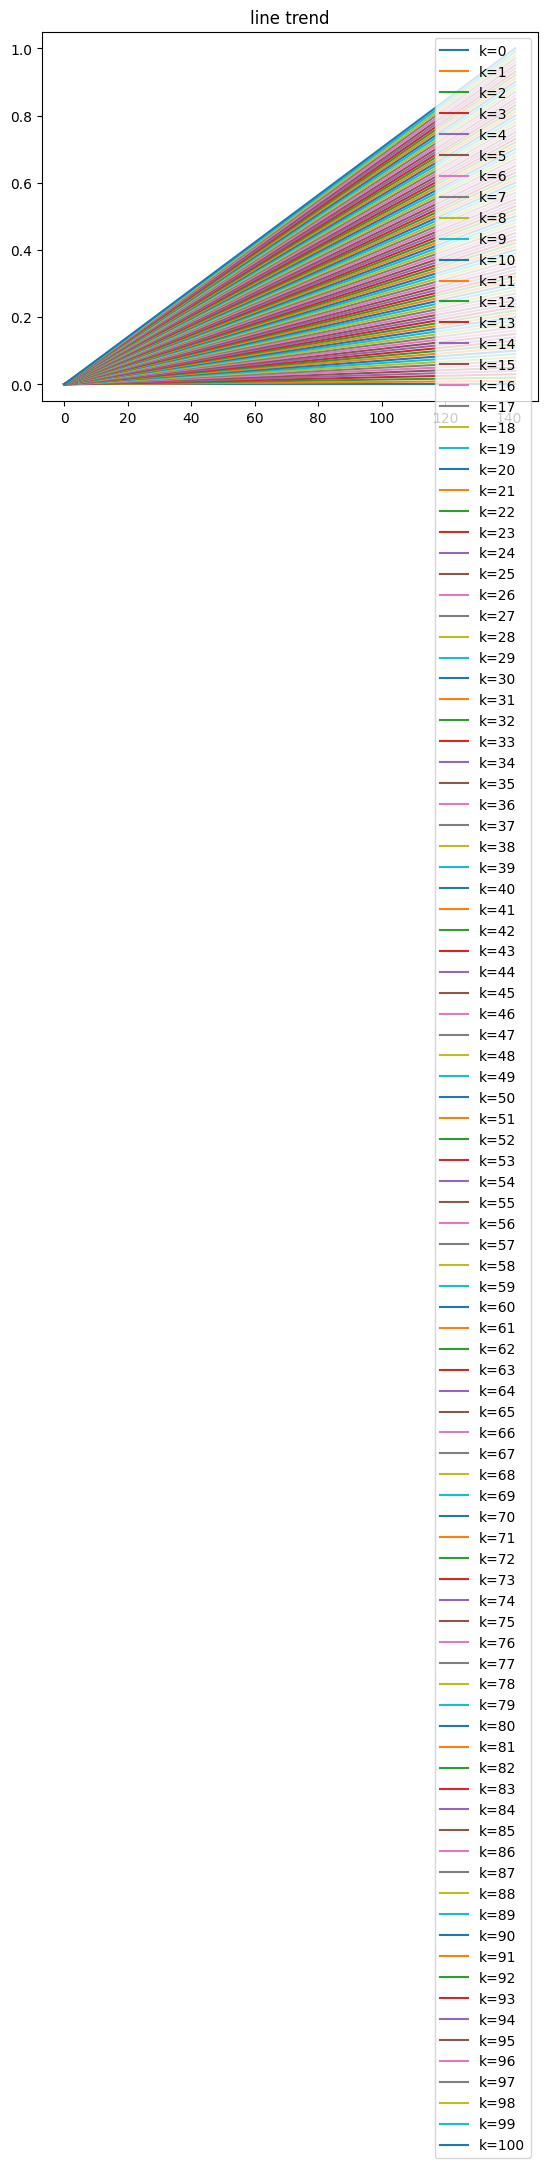

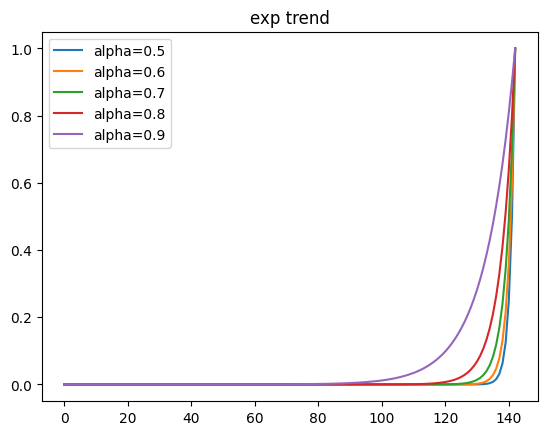

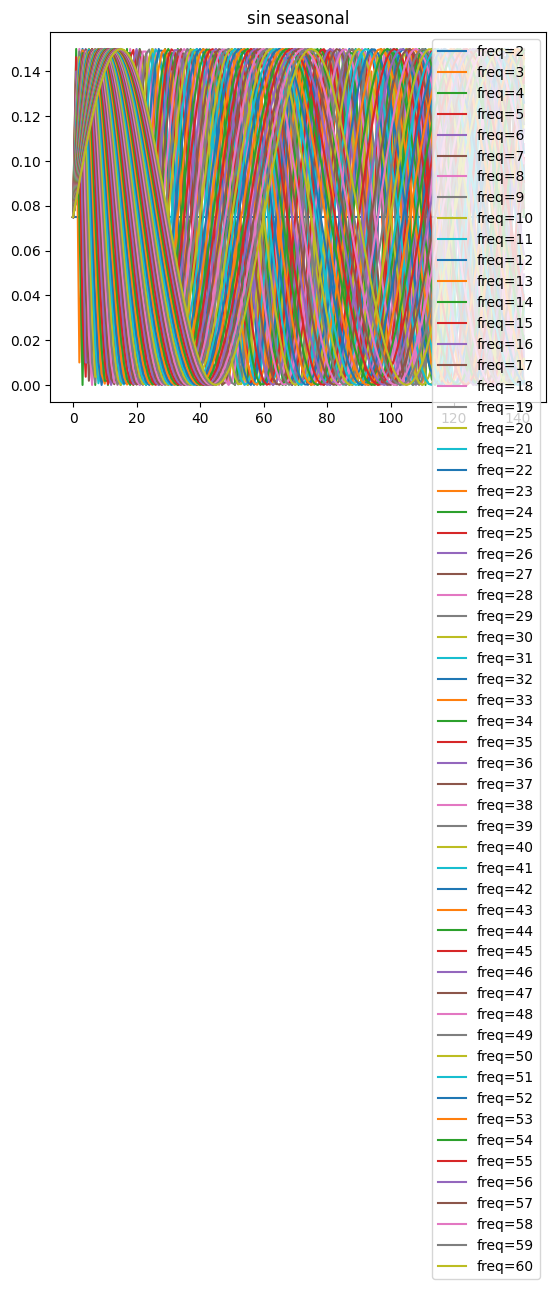

In [ ]:
t = np.arange(df.shape[0])
coefficient = np.arange(0, 101)
alphas = np.array([.5, .6, .7, .8, .9])
frequencies = np.arange(2, 61)

gc = GenerateComponents(t)
show = Show()

line_trend = gc.gen_line_trend(coefficient)
name_line_trend = [f'k={c}' for c in coefficient]
show.one_plot(line_trend.data, name_line_trend, title=f'line trend')

exp_trend = gc.gen_exp_trend(alphas)
name_exp_trend = [f'alpha={a}' for a in alphas]
show.one_plot(exp_trend.data, name_exp_trend, title=f'exp trend')


seasonal = gc.gen_seasonal(frequencies, .15)
name_seasonal = [f'freq={f}' for f in frequencies]
show.one_plot(seasonal.data, name_seasonal, title='sin seasonal')

name = name_line_trend + name_exp_trend + name_seasonal

# name = []
# seasonals = None
# for i, coef in enumerate(coefs):
#   seasonal = gc.gen_seasonal(frequencies, coef)
#   name_s = [f'c={coef}, freq={f}' for f in frequencies]
#   if not i:
#     seasonals = seasonal
#   else:
#     seasonals = seasonals + seasonal
#   name += name_s
#   show.one_plot(seasonal.data, name_s, )

## code

In [ ]:
data_line_trend_seasonal = []
name_line_trend_seasonal = []
for i_line_trend in range(len(name_line_trend)):
  for i_seasonal in range(len(name_seasonal)):
    data_line_trend_seasonal.append(line_trend.data[i_line_trend] + seasonal.data[i_seasonal])
    name_line_trend_seasonal.append(name_line_trend[i_line_trend] + ' ' + name_seasonal[i_seasonal])

data_2_seasonal = []
name_2_seasonal = []
for i_s1 in range(len(name_seasonal)):
  for i_s2 in range(len(name_seasonal)):
    data_2_seasonal.append(seasonal.data[i_s1] + seasonal.data[i_s2])
    name_2_seasonal.append(name_seasonal[i_s1] + name_seasonal[i_s2])

data_3_seasonal = []
name_3_seasonal = []
for i_s1 in range(len(name_seasonal)):
  for i_s2 in range(len(name_seasonal)):
    for i_s3 in range(len(name_seasonal)):
      data_3_seasonal.append(seasonal.data[i_s1] + seasonal.data[i_s2] + seasonal.data[i_s3])
      name_3_seasonal.append(name_seasonal[i_s1] + name_seasonal[i_s2] + name_seasonal[i_s3])

data_4_seasonal = []
name_4_seasonal = []
for i_s1 in range(len(name_seasonal)):
  for i_s2 in range(len(name_seasonal)):
    for i_s3 in range(len(name_seasonal)):
      for i_s4 in range(len(name_seasonal)):
        data_4_seasonal.append(seasonal.data[i_s1] + seasonal.data[i_s2] + seasonal.data[i_s3] + seasonal.data[i_s4])
        name_4_seasonal.append(name_seasonal[i_s1] + name_seasonal[i_s2] + name_seasonal[i_s3] + name_seasonal[i_s4])


name += name_line_trend_seasonal + name_2_seasonal + name_3_seasonal + name_4_seasonal
gd = line_trend + exp_trend + seasonal + GenerateData(data=np.array(data_line_trend_seasonal)) + \
                GenerateData(data=np.array(data_2_seasonal)) + GenerateData(data=np.array(data_3_seasonal)) + \
                GenerateData(data=np.array(data_4_seasonal))
size_seasonal = len(name_seasonal) + len(name_line_trend_seasonal) + len(name_2_seasonal) + len(name_3_seasonal) + len(name_4_seasonal)
# hw_compare = HWCompare(gd, name) # '/content/drive/MyDrive/SckillFactory/ВУЗ/диплом/data/output/hw_coponents_compare_long_forecast.csv'
# hw_compare.compare(size_seasonal, [52] + list(frequencies))

All combinations 1743976
cimbination 1
cimbination 2
cimbination 3
cimbination 4
cimbination 5
cimbination 6
cimbination 7
cimbination 8
cimbination 9
cimbination 10
cimbination 11
cimbination 12
cimbination 13
cimbination 14
cimbination 15
cimbination 16
cimbination 17
cimbination 18
cimbination 19
cimbination 20
cimbination 21
cimbination 22
cimbination 23
cimbination 24
cimbination 25
cimbination 26
cimbination 27
cimbination 28
cimbination 29
cimbination 30
cimbination 31
cimbination 32
cimbination 33
cimbination 34
cimbination 35
cimbination 36
cimbination 37
cimbination 38
cimbination 39
cimbination 40
cimbination 41
cimbination 42
cimbination 43
cimbination 44
cimbination 45
cimbination 46
cimbination 47
cimbination 48
cimbination 49
cimbination 50
cimbination 51
cimbination 52
cimbination 53
cimbination 54
cimbination 55
cimbination 56
cimbination 57
cimbination 58
cimbination 59
cimbination 60
cimbination 61
cimbination 62
cimbination 63
cimbination 64
cimbination 65
cimbinati

In [ ]:
gd = GenerateData(df.y, line_trend.data) + GenerateData(df.y, exp_trend.data) + GenerateData(df.y, seasonal.data)
# gd = line_trend + exp_trend + seasonal
size_seasonal = len(name_seasonal)
base_path = '/content/drive/MyDrive/SckillFactory/ВУЗ/диплом/data/output/'
df_path = base_path + 'hw_components_compare.csv'
df_path_lf = base_path + 'hw_components_compare_long_forecast.csv'

periods = list(frequencies) + ([52] if 52 not in list(frequencies) else [])

# hw_compare = HWCompare(gd, name, df_path)
# hw_compare.compare(size_seasonal, [52] + periods)

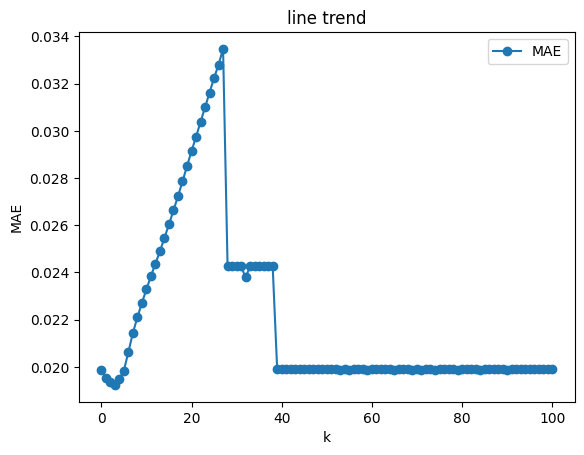

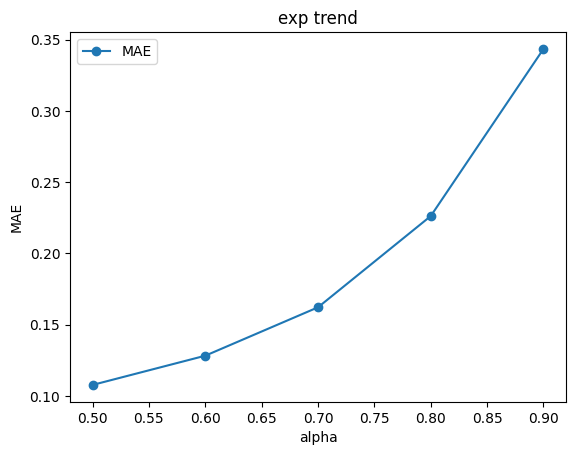

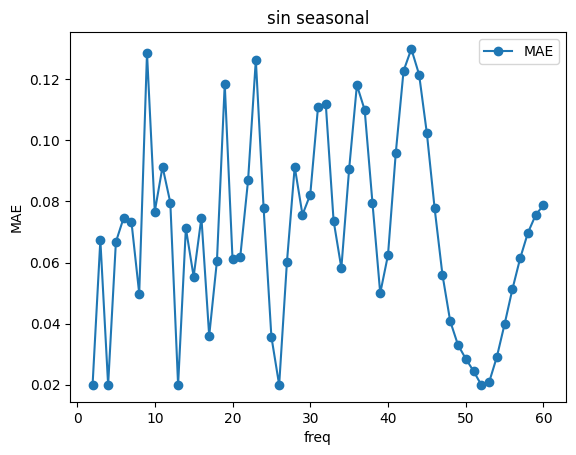

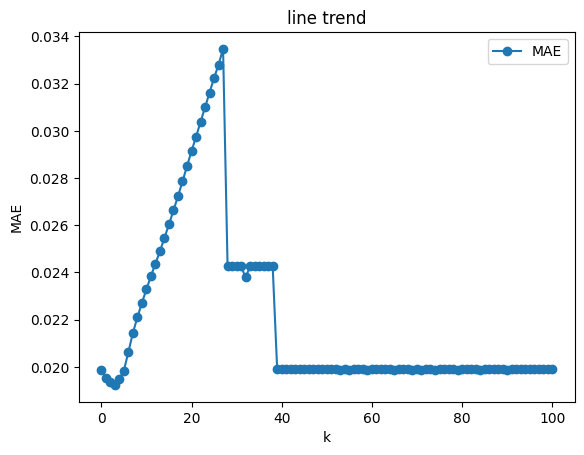

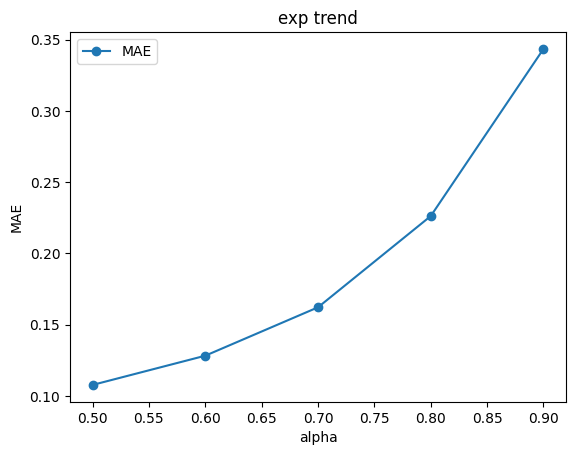

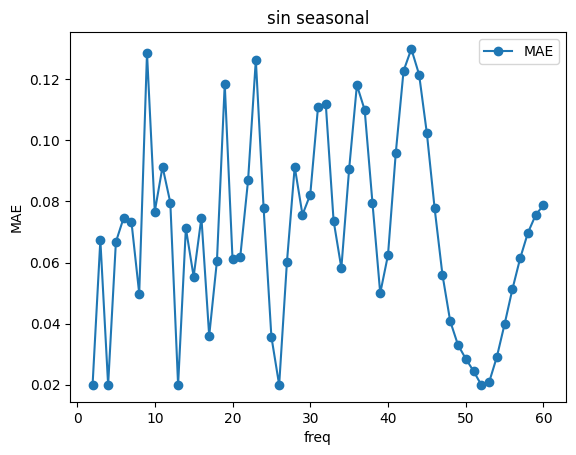

In [ ]:
base_path = '/content/drive/MyDrive/SckillFactory/ВУЗ/диплом/data/output/'
bp = BestParams()
bp.load(base_path + 'hw_compare.csv')
best_params = bp.search_best_params(['name', 'trend', 'seasonal', 'period', 'aicc', 'mae'])
# bp.plot(['name', 'trend', 'seasonal', 'period', 'aicc', 'bic'], inf_cr=['aicc'])
bp.plot(['name', 'trend', 'seasonal', 'period', 'aicc', 'bic', 'mae'], inf_cr=['mae'])
bp.plot(['name', 'trend', 'seasonal', 'period', 'aicc', 'bic', 'mae'], inf_cr=['mae'], sort_by=['aicc', 'bic'])

In [ ]:
bp.print()  # print best params

[k=0, nan, add, 52, -670.5258118629953, 0.0198840906754713]
[k=1, nan, add, 52, -671.1393414707861, 0.0195418062169465]
[k=2, nan, add, 52, -671.6790932537339, 0.0193695841450164]
[k=3, nan, add, 52, -672.1123759349987, 0.0192360661205106]
[k=4, nan, add, 52, -672.4009426451494, 0.0194889604266621]
[k=5, nan, add, 52, -672.5111409362676, 0.0198408785368244]
[k=6, nan, add, 52, -672.4279869827317, 0.020630174577129]
[k=7, nan, add, 52, -672.1683935388903, 0.0214364963580481]
[k=8, nan, add, 52, -671.7610367315027, 0.0221037244619424]
[k=9, nan, add, 52, -671.2455213610068, 0.0227124762014272]
[k=10, nan, add, 52, -670.6547951142838, 0.0232818342547501]
[k=11, nan, add, 52, -670.0145709944151, 0.0238446199675624]
[k=12, nan, add, 52, -669.3432801893541, 0.0243788672710298]
[k=13, nan, add, 52, -668.6548836866597, 0.0248968549655361]
[k=14, nan, add, 52, -667.9585033339077, 0.0254688561301811]
[k=15, nan, add, 52, -667.2602977338531, 0.0260329159128388]
[k=16, nan, add, 52, -666.565125599

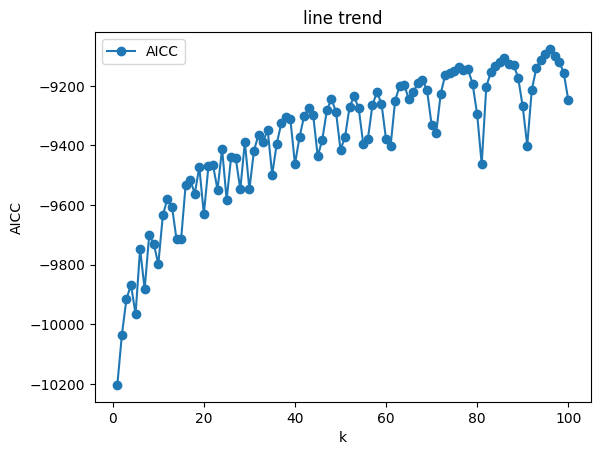

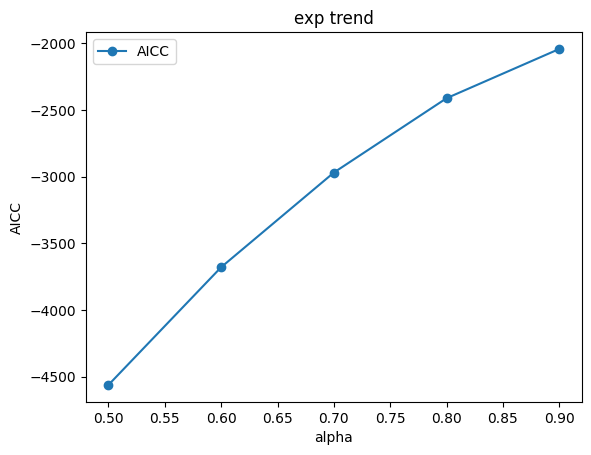

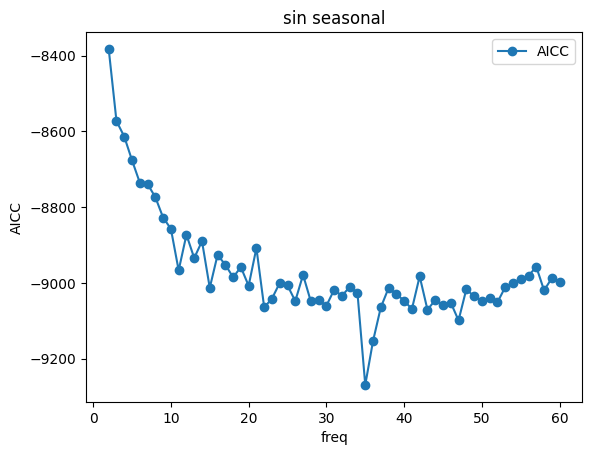

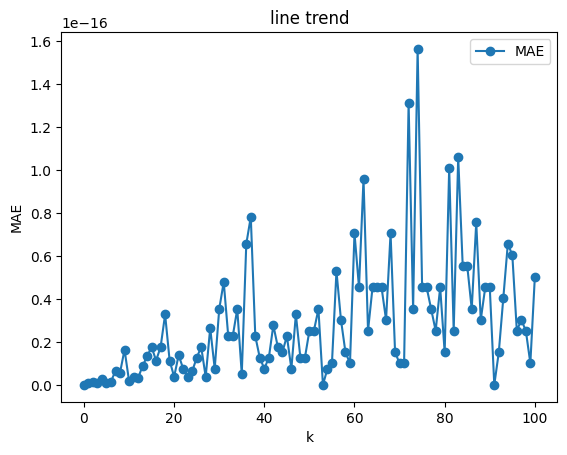

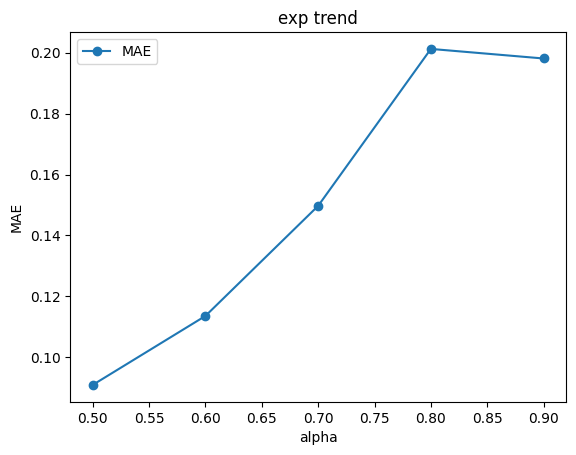

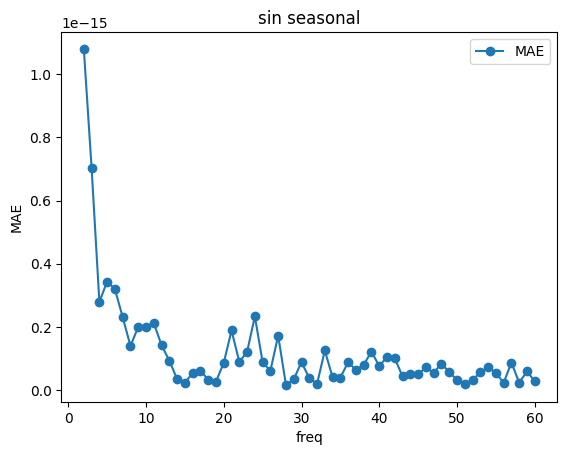

In [ ]:
bp = BestParams()
bp.load(base_path + 'hw_components_compare.csv')
best_params = bp.search_best_params(['name', 'trend', 'seasonal', 'period', 'aicc', 'mae'])
bp.plot(['name', 'trend', 'seasonal', 'period', 'aicc', 'bic'], inf_cr=['aicc'])
bp.plot(['name', 'trend', 'seasonal', 'period', 'aicc', 'bic', 'mae'], inf_cr=['mae'])

In [ ]:
bp.print()

[k=0, nan, nan, 52, -inf, 0.0]
[k=1, add, nan, 52, -10203.337882563585, 7.0965960380869395e-19]
[k=2, add, nan, 52, -10035.596264868076, 1.4193192076173877e-18]
[k=3, add, nan, 52, -9914.953315626612, 7.8851067089854875e-19]
[k=4, add, nan, 52, -9867.85464717257, 2.8386384152347758e-18]
[k=5, add, nan, 52, -9966.14326940404, 9.462128050782585e-19]
[k=6, add, nan, 52, -9747.211697931103, 1.5770213417970973e-18]
[k=7, add, nan, 52, -9882.7259066906, 6.623489635547809e-18]
[k=8, add, nan, 52, -9700.113029477065, 5.6772768304695516e-18]
[k=9, add, nan, 52, -9729.788692269218, 1.6401021954689813e-17]
[k=10, add, nan, 52, -9798.401651708533, 1.892425610156517e-18]
[k=11, add, nan, 52, -9633.478025734994, 3.784851220313033e-18]
[k=12, add, nan, 52, -9579.470080235596, 3.1540426835941946e-18]
[k=13, add, nan, 52, -9605.260444413523, 8.831319514063745e-18]
[k=14, add, nan, 52, -9714.984288995094, 1.3246979271095618e-17]
[k=15, add, nan, 52, -9715.02916613979, 1.766263902812749e-17]
[k=16, add, 

## code 2

In [3]:
hw_df = pd.read_csv('/content/drive/MyDrive/SckillFactory/ВУЗ/диплом/data/output/' + 'hw_compare.csv')
hw_df.head()

,name,trend,seasonal,period,aicc,bic,mae,mse
0,k=0,NaN,NaN,52,-476.880421,-471.633668,0.034063,0.001903
1,k=0,NaN,add,52,-670.525812,-619.303122,0.019884,0.000698
2,k=0,add,NaN,52,-472.507567,-462.061247,0.033223,0.001693
3,k=0,add,add,52,-659.032224,-612.855051,0.024277,0.000913
4,k=1,NaN,NaN,52,-476.884464,-471.637711,0.033969,0.001871


In [4]:
mask = (hw_df['trend'] == 'add') & (hw_df['seasonal'] == 'add') & (hw_df['period'] == 52)
hw_df_fillter = hw_df[mask].drop_duplicates(ignore_index=True)
hw_df_fillter

,name,trend,seasonal,period,aicc,bic,mae,mse
0,k=0,add,add,52,-659.032224,-612.855051,0.024277,0.000913
1,k=1,add,add,52,-659.032733,-612.855559,0.024251,0.000912
2,k=2,add,add,52,-659.032719,-612.855546,0.024261,0.000912
3,k=3,add,add,52,-659.032302,-612.855129,0.024228,0.000910
4,k=4,add,add,52,-659.032745,-612.855571,0.024267,0.000913
...,...,...,...,...,...,...,...,...
160,freq=56,add,add,52,-646.327926,-600.150752,0.065099,0.004998
161,freq=57,add,add,52,-644.012427,-597.835253,0.076811,0.007069
162,freq=58,add,add,52,-642.079931,-595.902757,0.086591,0.009178
163,freq=59,add,add,52,-640.384792,-594.207618,0.093845,0.011040


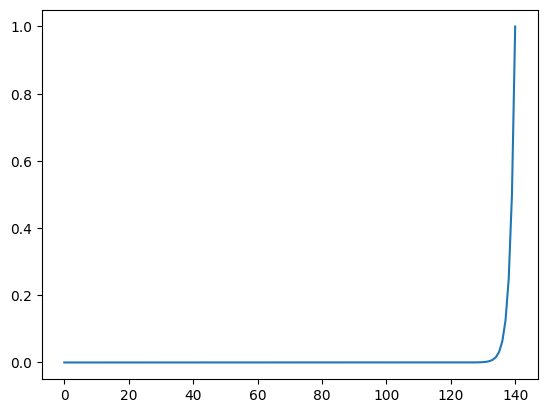

In [ ]:
n = 141  # Количество фолдов
alpha = .5  # Коэффициент убывания

weights = np.array([alpha ** (n - i) for i in range(1, n + 1)])
# weights /= weights.sum()
# weights *= 2

plt.plot(weights)
plt.show()

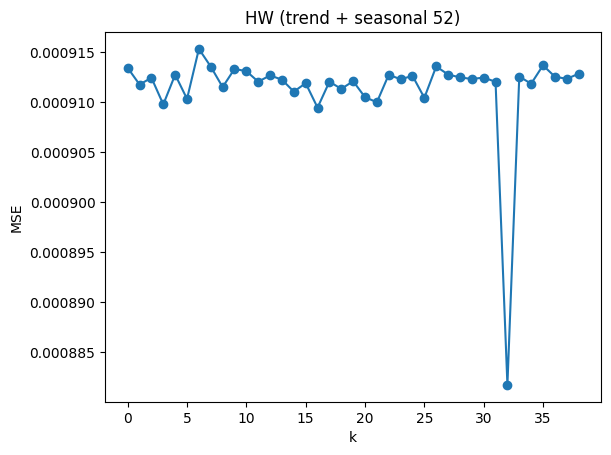

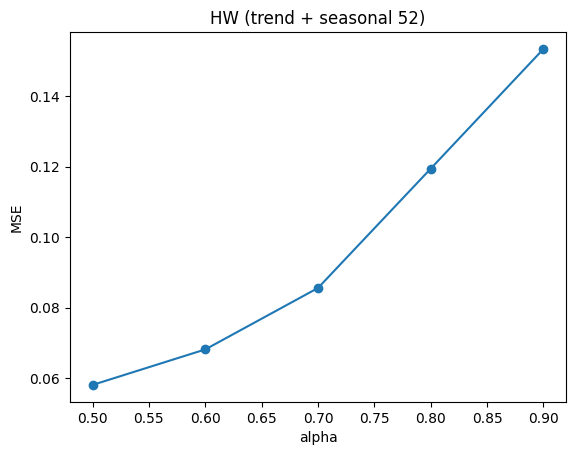

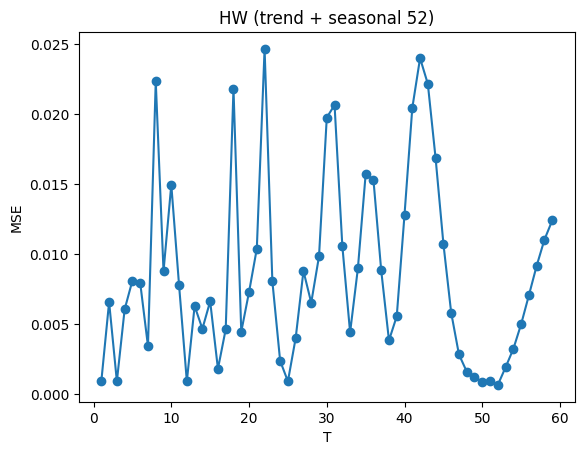

In [ ]:
def plot(df_sarima, column='mae'):
  dft = df_sarima.iloc[:39]#line_trend.data.shape[0]]
  dfa = df_sarima.iloc[line_trend.data.shape[0]:-seasonal.data.shape[0]]
  dfs = df_sarima.iloc[-seasonal.data.shape[0]:]

  plt.plot(range(dft.shape[0]), dft[column], marker='o')
  plt.ylabel(column.upper())
  plt.xlabel('k')
  plt.title('HW (trend + seasonal 52)')
  plt.show()

  plt.plot([.5, .6, .7, .8, .9], dfa[column], marker='o')
  plt.ylabel(column.upper())
  plt.xlabel('alpha')
  plt.title('HW (trend + seasonal 52)')
  plt.show()

  plt.plot(range(1, dfs.shape[0] + 1), dfs[column], marker='o')
  plt.ylabel(column.upper())
  plt.xlabel('T')
  plt.title('HW (trend + seasonal 52)')
  plt.show()

plot(hw_df_fillter, 'mse')

In [ ]:
hw_df_fillter.iloc[101:106]

,name,trend,seasonal,period,aicc,bic,mae,mse,p_rmse
101,alpha=0.5,add,add,52,-659.032223,-612.855050,0.106673,0.058137,24.111654
102,alpha=0.6,add,add,52,-659.032260,-612.855086,0.125907,0.068197,26.114620
103,alpha=0.7,add,add,52,-659.036338,-612.859164,0.156086,0.085606,29.258507
104,alpha=0.8,add,add,52,-659.048858,-612.871684,0.215137,0.119423,34.557652
105,alpha=0.9,add,add,52,-650.118587,-603.941413,0.301051,0.153333,39.157818


In [9]:
hw_df_fillter['p_rmse'] = np.sqrt(hw_df_fillter.mse) * 100
hw_df_fillter.iloc[:101].p_rmse.diff().describe()

,p_rmse
count,100.000000
mean,-0.003414
std,0.034788
min,-0.339596
25%,-0.001215
50%,-0.000137
75%,0.000826
max,0.051497


## ensemble (хуже работает чем HW)

In [ ]:
def get_model(train, trend, seasonal, seasonal_periods):
  return [
      ExponentialSmoothing(train,
                           trend=trend[i],
                           seasonal=seasonal[i],
                           seasonal_periods=seasonal_periods[i])
      for i in range(len(trend))
  ]

def get_fit(models):
  return [
      model.fit()
      for model in models
  ]

def get_forecast(results, step):
  return [
      result.forecast(steps=step)
      for result in results
  ]

def get_metrics(test, forecasts):
  mae = [
      mean_absolute_error(test, forecast) for forecast in forecasts
  ]
  mse = [
      mean_squared_error(test, forecast) for forecast in forecasts
  ]
  return (mae, mse)

def get_weights(n, alpha=.9):
  return np.array([alpha ** (n - i) for i in range(1, n + 1)])

def build_ensemble(periods=[52], for_each=False):
  models = get_model(Y_train_df.y, [None]*len(periods), ['add']*len(periods), periods)
  results = get_fit(models)
  forecasts = get_forecast(results, Y_test_df.shape[0])
  if for_each:
    mae, mse = get_metrics(Y_test_df.y, forecasts)
  else:
    forecast = forecasts[0].values
    weights = get_weights(len(forecasts))
    for i, fr in enumerate(forecasts[1:]):
      forecast *= weights[i]
    mae = mean_absolute_error(Y_test_df.y, forecast)
    mse = mean_squared_error(Y_test_df.y, forecast)
  return (mae, mse)

build_ensemble()

(0.019884090675471346, 0.0006980258688037938)

## example

In [ ]:
def show(tt_df, np_1,  name_param, tnp):
  fig, axes = plt.subplots(1, 3, figsize=(15, 5))

  axes[0].plot(tt_df[tnp], tt_df['mse'], marker='o')
  axes[0].set_xlabel(name_param)
  axes[0].set_ylabel('MSE')
  axes[0].set_title('Оценка прогнозов')

  axes[1].plot(tt_df[tnp].unique(), tt_df['mae'], marker='o')
  axes[1].set_xlabel(name_param)
  axes[1].set_ylabel('MAE')
  axes[1].set_title('Оценка прогнозов')

  axes[2].plot(tt_df[tnp], tt_df['aic'], marker='o', label='AIC')
  axes[2].plot(tt_df[tnp], tt_df['aicc'], marker='o', label='AICc')
  axes[2].plot(tt_df[tnp], tt_df['bic'], marker='o', label='BIC')
  axes[2].set_xlabel(name_param)
  axes[2].set_ylabel('Информационные критерии')
  axes[2].set_title('Качество модели')
  axes[2].legend()

  plt.show()

  fig, axes = plt.subplots(1, 2, figsize=(15, 5))

  axes[0].plot(tt_df[tnp], tt_df['adf_resid'], marker='o')
  axes[0].set_xlabel(name_param)
  axes[0].set_ylabel('p-value')
  axes[0].set_title('Dickey–Fuller') # Стационарность остатков

  axes[1].plot(tt_df[tnp], tt_df['lb_resid'], marker='o')
  axes[1].set_xlabel(name_param)
  axes[1].set_ylabel('количество значимых корреляций')
  axes[1].set_title('Ljung-Box') # Стационарность остатков

  plt.show()

  fig, axes = plt.subplots(1, 3, figsize=(15, 5))

  axes[0].plot(tt_df[tnp], tt_df['jb_resid'], marker='o')
  axes[0].set_xlabel(name_param)
  axes[0].set_ylabel('p-value')
  axes[0].set_title('Jarque-Bera')  # Нормальность остатков

  axes[1].plot(tt_df[tnp], tt_df['skew_resid'], marker='o')
  axes[1].set_xlabel(name_param)
  axes[1].set_ylabel('Skew')
  axes[1].set_title('Асимметричность остатков')

  axes[2].plot(tt_df[tnp], tt_df['kurtosis_resid'], marker='o')
  axes[2].set_xlabel(name_param)
  axes[2].set_ylabel('kurtosis')
  axes[2].set_title('Эксцесс остатков')

  plt.show()

  plt.plot(tt_df[tnp], tt_df['time_work'])
  plt.xlabel(name_param)
  plt.ylabel('sec')
  plt.title('Время вычисления')